# SVM

## Support Vector Machine
* 선형 지도 학습 분류 알고리즘
* Support Vector : 경계 최외곽에 위치한 샘플
* 결정 평면 : 마진이 가장 넓은 모델 선택
* 스케일 민감
![image.png](https://i.imgur.com/uKvmU3k.png)

### scikit-learn
* `sklearn.svm.SVC(kernel='linear')`
* `sklearn.svm.LinearSVC()`
    * 샘플이 많은 경우 효과적
    * 표준화 전처리 필요
        * `sklearn.preprocessing.StandardScaler`
            * 평균 = 0, 표준편차 = 1
            * 평균으로 빼고, 표준편차로 나눈 값


#### 랜덤수 분류 예제

In [ ]:
# 결정경계를 그리기 위한 함수
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
   

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    #svs = svm_clf.support_vectors_
    #plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "g-", linewidth=2)
    plt.plot(x0, gutter_up, "g--", linewidth=2)
    plt.plot(x0, gutter_down, "g--", linewidth=2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

a = np.random.randint(0,125,(25,2))
b = np.random.randint(126, 255,(25,2))
trainData = np.float32(np.vstack((a,b)))

m = np.mean(trainData, axis=0)
trainData -= m
s = np.std(trainData, axis=0)
trainData /= s
#scaler = StandardScaler()
#scaler.fit(trainData)
#trainData = scaler.transform(trainData)

responses = np.zeros((50,1), np.int32)
responses[0:25] = 1
blue = trainData[responses.ravel()==0]
plt.scatter(blue[:,0],blue[:,1],80,'b','o')

red = trainData[responses.ravel()==1]
plt.scatter(red[:,0],red[:,1],80,'r','s')

newcomer = np.random.randint(0,255,(1,2)).astype(np.float32)
newcomer = (newcomer-m)/s
#newcomer = scaler.transform(newcomer)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','*')

svm = SVC(kernel='linear')

svm.fit(trainData, responses.ravel())

plot_svc_decision_boundary(svm, np.min(trainData), np.max(trainData))

results = svm.predict(newcomer)
plt.annotate('red' if results[0]==1.0 else 'blue', xy=newcomer[0],
xytext=(newcomer[0]))
print("result, 1=red, 0=blue: {}\n".format(results))
plt.show()

### 소프트 마진 분류
* 하드 마진 분류(hard margin classification)
    * 모든 데이터가 마진밖에 있는 경우
    * 샘플에 이상치가 있으면 일반화 오류
* 소프트 마진 분류(Soft margin classification)
    * C 하이퍼 파라미터 사용
    * 마진오류 : 경계 마진 안에 샘플 위치
    * C 값이 작으면 일반화
    * C 값이 커지면 과대 적합
![image.png](https://i.imgur.com/6wYsjb8.png)    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

a = np.random.randint(0,125,(25,2))
b = np.random.randint(126, 255,(25,2))
a_ = np.max(a, axis=0)
b_ = np.min(b, axis=0)
a[0] = b_
b[0] = a_
trainData = np.float32(np.vstack((a,b)))


m = np.mean(trainData, axis=0)
trainData -= m
s = np.std(trainData, axis=0)
trainData /= s

#scaler = StandardScaler()
#scaler.fit(trainData)
#trainData = scaler.transform(trainData)

responses = np.zeros((50,1), np.float32)
responses[0:25] = 1.0
blue = trainData[responses.ravel()==0]
red = trainData[responses.ravel()==1]



newcomer = np.random.randint(0,255,(1,2)).astype(np.float32)
newcomer -=m
newcomer /=s
#newcomer = scaler.transform(newcomer)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','*')

svm1 = SVC(C=0.1,kernel='linear', )
svm2 = SVC(C=5000, kernel='linear', )

svm1.fit(trainData, responses.ravel())
svm2.fit(trainData, responses.ravel())
results1 = svm1.predict(newcomer)
results2 = svm2.predict(newcomer)

plt.scatter(red[:,0],red[:,1],80,'r','s')
plt.scatter(blue[:,0],blue[:,1],80,'b','o')
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','*')
plot_svc_decision_boundary(svm1, np.min(trainData), np.max(trainData))
plt.annotate('red' if results1[0]==1.0 else 'blue', xy=newcomer[0],
              xytext=(newcomer[0]))
plt.title("$C = {}$".format(svm1.C), fontsize=16)
plt.show()
print("result1, 1=red, 0=blue: {}\n".format(results1))

plt.scatter(red[:,0],red[:,1],80,'r','s')
plt.scatter(blue[:,0],blue[:,1],80,'b','o')
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','*')
plot_svc_decision_boundary(svm2,  np.min(trainData), np.max(trainData))
plt.annotate('red' if results2[0]==1.0 else 'blue', xy=newcomer[0],
              xytext=(newcomer[0]))
plt.title("$C = {}$".format(svm2.C), fontsize=16)
plt.show()
print("result2, 1=red, 0=blue: {}\n".format(results2))


### 비선형 및 다항식 커널
* 다항식 특성 추가
    * 특성을 2차식으로 추가
    * $x_2 = (x1)^2$
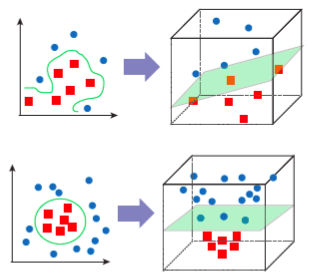

#### 다항식 추가 예제

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(10, dtype=np.float32)
y = np.ones(10)

x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)
plt.plot(x,y, 'ob')
plt.plot(x[3:7], y[3:7], 'sr')
plt.title('non-liner model')
plt.show()

x2 = (x**2)
plt.plot(x,x2, 'ob')
plt.plot(x[3:7], x2[3:7], 'sr')
plt.title('polynomial')
plt.show()


#### 커널 함수 트릭(kernel trick)
* 다항식 특성을 추가하지 않고 커널 함수로 새로운 거리 값을 계산
    * 실제로 아무 특성도 추가하지 않으면서 다항식 특성을 많이 추가한 효과
    
* `sklean.svm.SVC(kernel='rbf', gamma=5, C=0.001)`
    * 가우시안 RBF 커널 트릭 사용
    * 다항식 커널 트릭 사용
    * degree :  다항식 차수
    * coef0=0 : 다항식 커널의 상수항
    * 차수가 높아 지면 1보다 크고 작은 값의 격차가 커짐
    * 고차항의 영향 조절

* kernel
    * linear
        * $K(x_i, x_j)= x_ix_j$
        * `SVC(kernel='liner')`
    * polynomial
        * $K(x_i, x_j) = (\gamma(x_i, x_j) + r)^d$, $d$ =degree
            * $\gamma$ =coef0 로 전달
        * `SVC(kernel='ploy', degree=3, coef0=1, C=5)`
            * degree : 다항식 차수
            * coef0=0 : 다항식 커널의 상수항 $r$, 차수가 높아지면 1보다 크고 작은 값의 격차가 커짐, 고차항의 영향 조절
    * rbf : (Gausian radial basis function)
        * $K(x_i, x_j) = exp(\gamma||x_i-x_j||^2)$
            * $\gamma$=gamma > 0, 작아 질수록 마진이 커진다.
        * `SCV(kernel='rbf', gamma=5, C=0.001)`
    * sigmoid : $K(x_i, x_j) = (tanh(\gamma(x_i, x_j) + r))$, $r$은 coef0로 전달
        * `SVC(kernel='sigmoid')`

#### SVM 손글씨 인식 예제

In [ ]:
import numpy as np, cv2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, test_size=0.2)

print(X_train.shape)
print(X_train[0])
'''
m = np.mean(X_train, axis=0)
X_train -= m
s = np.std(X_train, axis=0)
X_train /= s
print(m.shape, s.shape)

X_test -=m
X_test /= s
'''
svm = SVC(kernel='rbf',C=10,  gamma=0.001)
#svm = SVC(kernel='poly', degree=1, coef0=1, C=5, gamma=0.01)

svm.fit(X_train,y_train)

print("Train Accuracy :", svm.score(X_train, y_train))
print("Test Accuracy1 :", svm.score(X_test, y_test))

In [ ]:
import sys
sys.path.append('..')
import img2data

image = cv2.imread('../img/0458.png')
plt.imshow(image)
plt.show()
numbers = img2data.img2digits(image, (8,8))
for i, n in enumerate(numbers):
    pred = svm.predict(n/255*16)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred))
    plt.imshow(n.reshape(8,8), cmap="gray")
    plt.axis("off")

### 최적의 매개변수 찾기
* 하이퍼 파라미터 : 개발자가 지정해야 하는 매개변수
* 그리드 서치
    * `sklearn.model_selection.GridSearvhCV`

In [ ]:
import numpy as np, cv2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, test_size=0.2)

parameters = [
    {"C":[1,10,100,1000], "kernel": ["linear"]},
    {"C":[1,10,100,1000], "kernel": ["rbf"], "gamma": [0.001, 0.0001]},
    {"C":[1,10,100,1000], "kernel": ["sigmoid"], "gamma": [0.001, 0.0001]},
]

kfold_cv = KFold(n_splits=5, shuffle=True)
clf = GridSearchCV(SVC(), parameters, cv=kfold_cv)
clf.fit(X_train, y_train)
print("Optimized parameter:", clf.best_estimator_)

print("Accuracy :", clf.score(X_test, y_test))